In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from tkinter import *
from tkinter import filedialog
import os
from PIL import Image,ImageTk

In [3]:
df=pd.read_csv("C:\\Users\\Pro\\Downloads\\amazon.csv")

In [4]:
df.head()

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [6]:
df.dropna(inplace=True)

In [7]:
df.loc[df["Sentiment"]<=3,'Sentiment']=0
df.loc[df["Sentiment"]>3,'Sentiment']=1


In [8]:
df["Sentiment"].value_counts()

0    15000
1     9999
Name: Sentiment, dtype: int64

In [9]:
df["Review"]=df["Review"].astype(str)

In [10]:
type(df["Review"])

pandas.core.series.Series

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24999 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  24999 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 585.9+ KB


# Data visulization

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

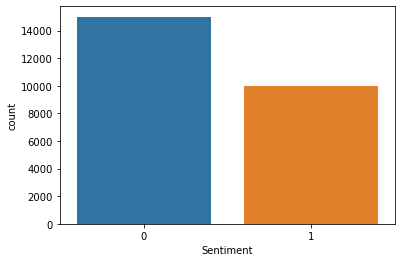

In [12]:
sns.countplot(df['Sentiment'])

# Data cleaning

In [13]:

def _remove_special_chars(x):
    x = re.sub(r'[^\w ]+', "", x)
    return x

In [15]:

df["Review"]=df["Review"].apply(lambda x:_remove_special_chars(x))


In [16]:
def _remove_emails(x):
    return re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x)
df['Review']=df['Review'].apply(lambda x:_remove_emails(x))
 

In [17]:
def _remove_urls(x):
    return re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , x)
df['Review']=df['Review'].apply(lambda x:_remove_urls(x)) 

In [18]:
df.head()

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,0
1,This case takes so long to ship and its not ev...,0
2,Good for not droids Not good for iPhones You c...,0
3,The cable was not compatible between my macboo...,0
4,The case is nice but did not have a glow light...,0


# Feature Extraction

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix,classification_report

In [20]:
Tf=TfidfVectorizer(max_features=20000,ngram_range=(1,3),analyzer='char')
Tf


TfidfVectorizer(analyzer='char', max_features=20000, ngram_range=(1, 3))

In [21]:
X=Tf.fit_transform(df['Review']).toarray()
y=df['Sentiment']


# Data spliting

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [23]:
from sklearn.svm import LinearSVC
clf=LinearSVC()
clf.fit(x_train,y_train)

LinearSVC()

In [24]:
y_pred=clf.predict(x_test)

In [25]:
clf.score(x_train,y_train)

0.8744437221861093

In [26]:
clf.score(x_test,y_test)

0.8224

In [27]:
print(confusion_matrix(y_test,y_pred))

[[2661  319]
 [ 569 1451]]


<AxesSubplot:>

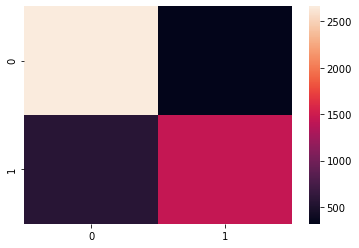

In [28]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred))

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      2980
           1       0.82      0.72      0.77      2020

    accuracy                           0.82      5000
   macro avg       0.82      0.81      0.81      5000
weighted avg       0.82      0.82      0.82      5000



In [30]:
x='it is very beaut'
vec=Tf.transform([x])
a=clf.predict(vec)
if a==1:
    print("positive")
else:
    print("negtive")

    

positive


In [31]:
a="it is so bad "
vec=Tf.transform([a])
x=clf.predict(vec)
if x==1:
    print("positive")
else:
    print("negtive")


negtive


In [32]:
import pickle
model=pickle.dumps(clf)


In [33]:
import pickle
saved_model=pickle.loads(model)

In [34]:
import pytesseract
import cv2
pytesseract.pytesseract.tesseract_cmd = r"E:\\Tesseract-OCR\\tesseract.exe"
img=cv2.imread("nega4-4.png")
cv2.imshow("image",img)
cv2.waitKey(0)
cv2.destroyAllWindows()
result=pytesseract.image_to_string(img)

In [35]:
print(result)

Inve snsness on Bee 62015 5:20:32 AM FST
‘rian says:

Hello. A customer service representative reached out to me vie email and spoke about my issues with the

‘SoundCore, They noted the speaker will purposely stop playing due to high volumes. However, they noted a

revised version ofthis speaker is going to be released shorty and I will surely update my review once T got

my hands on it. have noted this in my revised review. I am surprised nobody else has run into this isu

 

 

 

 

only to this post {oft ouase thing aa acetone dann Se es

 



In [36]:
ctr=1
c=1
ct=1
def  close_win():
    root.destroy()
def show_frame(frame):
    frame.tkraise()
        
def  analyse_text(a):
    global ctr
    vec=Tf.transform([a])
    x=saved_model.predict(vec)
    #l2=Label(frame2,text="",bg='hot pink')
    #l2.pack()
    if ctr>1:
        for widget in frame2.winfo_children():
            widget.destroy()        
    frame2.tkraise()
    if x==1:
        mylabel=Label(frame2,text="Positive",width=40,height=5,fg='purple',font=('Times 20 italic',50,'bold'),bg='ghost white').pack(pady=10)
    else:
        mylabel=Label(frame2,text="Negitive",width=40,height=5,fg='purple',font=('Times 20 italic',50,'bold'),bg='ghost white').pack(pady=10)
    bb=Button(frame2,text="back",padx=50,bd=6,fg="black",bg="orchid2",font=('Times 20 italic',20,'bold'),command=lambda:show_frame(frame11))
    bb.pack()
    b3=Button(frame2,text="exit",bd=6,bg="orchid1",font=('Times 20 italic',20,'bold'),command=close_win).pack(pady=10)
    
    ctr=ctr+1
def analyse_photo(img):
    global c
    pytesseract.pytesseract.tesseract_cmd = r"E:\\Tesseract-OCR\\tesseract.exe"
    result=pytesseract.image_to_string(img)
    vec=Tf.transform([result])
    x=saved_model.predict(vec)
    if c>1:
        for widget in frame4.winfo_children():
            widget.destroy()
            
    frame4.tkraise()
    my_label=Label(frame4,bg='ghost white')
    my_label.pack(pady=20)
    b3=Button(frame4,text="exit",bd=8,bg="orchid1",font=('Times 20 italic',10,'bold'),command=close_win).pack(side="bottom",padx=5)
    bP=Button(frame4,text="back",padx=20,bd=8,fg="black",bg="orchid2",font=('Times 20 italic',10,'bold'),command=lambda:show_frame(frame11))
    bP.pack(side="bottom",padx=5,pady=5);   
    if x==1:
        mylabel=Label(frame4,text="Positive",width=20,height=5,fg='orchid2',font=('Times 20 italic',50,'bold'),bg='ghost white').pack(pady=10)
        img=Image.open('happy.jpg')
        img.thumbnail((300,300))
        img1=ImageTk.PhotoImage(img)
        my_label.configure(image=img1)
        my_label.image=img1
    else:
        mylabel=Label(frame4,text="Negative",width=20,height=5,fg='orchid2',font=('Times 20 italic',50,'bold'),bg='ghost white').pack(side="top")
        img=Image.open('sad.jpg')
        img.thumbnail((300,300))
        img1=ImageTk.PhotoImage(img)
        my_label.configure(image=img1)
        my_label.image=img1
      
    c=c+1
    
def show_image(frame):
    global ct
    if ct>1:
        for widget in frame.winfo_children():
            widget.destroy()        
    frame.tkraise()
    lbl=Label(frame)
    lbl.pack(pady=10)
    fln=filedialog.askopenfilename(title="select Image file",filetypes=(("JPG File","*.jpg"),("PNG File","*.png"),("All File","*.*")))
    img=Image.open(fln)
    img1=ImageTk.PhotoImage(img)
    lbl.configure(image=img1)
    lbl.image=img1
    bb=Button(frame3,text="analyse photo",padx=50,bd=6,fg="black",bg="orchid2",font=('Times 20 italic',20,'bold'),command=lambda:analyse_photo(img))
    bb.pack(pady=10)
    ct=ct+1
    
    
    
    
    
        
        


In [39]:
root=Tk()
root.title("Sentiment Analysis")
root.geometry("800x500")
root.rowconfigure(0,weight=1)
root.columnconfigure(0,weight=1)
frame1=Frame(root,bg='ghost white')
frame11=Frame(root,bg='ghost white')
frame2=Frame(root,bg='ghost white')
frame3=Frame(root)
frame4=Frame(root,bg='ghost white')
frame11.grid(row=0,column=0,sticky='nsew')
frame2.grid(row=0,column=0,sticky='nsew')
frame1.grid(row=0,column=0,sticky='nsew')
frame3.grid(row=0,column=0,sticky='nsew')
frame4.grid(row=0,column=0,sticky='nsew')
#frame11
bg=ImageTk.PhotoImage(Image.open('mazon.jpg'))
la=Label(frame11,image=bg)
la.place(x=0,y=0)
b2=Button(frame11,text="enter text",padx=50,bd=6,fg="black",bg="medium purple1",font=('Times 20 italic',20,'bold'),command=lambda:show_frame(frame1))
b2.pack(side='bottom',pady=5)
b3=Button(frame11,text="choose photo",padx=50,bd=6,fg="black",bg="medium purple1",font=('Times 20 italic',20,'bold'),command=lambda:show_image(frame3))
b3.pack(side='bottom',pady=5)
#button1_canvas = canvas1.create_window( 100, 10,anchor = "nw",window = b2) 
#button2_canvas = canvas1.create_window( 100, 40,anchor = "nw",window = b3)                                
# frame1   
e=Entry(frame1,width=50,bd=10)
e.insert(0,"   enter your text    ")
e.pack(pady=50,padx=10)
b=Button(frame1,text="analyse the text",padx=50,bd=4,fg="black",bg="orchid2",font=('Times 20 italic',20,'bold'),command=lambda:analyse_text(e.get()))
b.pack(pady=10)
show_frame(frame11)
root.mainloop()

